<a href="https://colab.research.google.com/github/pawanshaw66/ML-Mark-Prediction/blob/main/student_mark_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Buisness Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
path = r"/content/markk_pred.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,time_study,Marks
0,4.508,19.202
1,0.096,7.734
2,3.133,13.811
3,7.909,53.018
4,7.811,55.299


In [4]:
df.tail()

,time_study,Marks
95,3.561,19.128
96,0.301,5.609
97,7.163,41.444
98,0.309,12.027
99,6.335,32.357


In [5]:
df.shape

(100, 2)

## Discover and visualize the data to gain insights

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time_study  100 non-null    float64
 1   Marks       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
df.describe()

,time_study,Marks
count,100.000000,100.000000
mean,4.077140,24.417690
std,2.372914,14.326199
min,0.096000,5.609000
25%,2.058500,12.633000
50%,4.022000,20.059500
75%,6.179250,36.676250
max,7.957000,55.299000


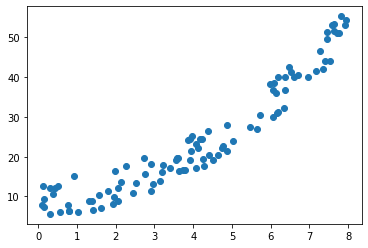

In [8]:
plt.scatter(x=df.time_study, y = df.Marks)

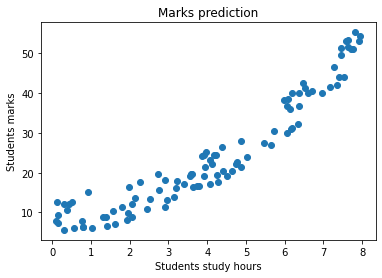

In [9]:
plt.scatter(x=df.time_study, y = df.Marks)
plt.xlabel("Students study hours")
plt.ylabel("Students marks")
plt.title("Marks prediction")
plt.show()

## Prepare the data for Machine Learning algorithms

In [10]:
# Data Cleaning
df.isnull()

,time_study,Marks
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
95,False,False
96,False,False
97,False,False
98,False,False


In [11]:
df.mean()

time_study     4.07714
Marks         24.41769
dtype: float64

In [12]:
# Split dataset
X = df.drop("Marks", axis = "columns")
y = df.drop("time_study", axis = "columns")


In [13]:
print(X.shape)

(100, 1)


In [14]:
print(y.shape)

(100, 1)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=51)

In [16]:
print(X_train.shape)

(80, 1)


In [17]:
print(y_train.shape)

(80, 1)


In [18]:
print(X_test.shape)

(20, 1)


## Select a model and train it

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.coef_

array([[5.49211084]])

In [22]:
lr.intercept_

array([2.02911007])

In [23]:
m = 5.3
c =68.88
y = m * 4 + c

In [24]:
y

90.08

In [25]:
lr.predict([[5.3]])[0][0].round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


31.14

In [26]:
y_pred = lr.predict(X_test)

In [27]:
y_pred

array([[15.85824516],
       [10.58032664],
       [ 4.35227296],
       [19.58738841],
       [42.95082791],
       [23.87123486],
       [45.72983599],
       [44.92798781],
       [ 6.4502593 ],
       [ 6.43927507],
       [27.47405957],
       [12.76069465],
       [22.88265491],
       [24.99711759],
       [43.99432897],
       [19.23589332],
       [28.27590775],
       [24.71152782],
       [26.78754572],
       [41.36909999]])

In [28]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["time_study","students_marks_original","student_marks_predicted"])

,time_study,students_marks_original,student_marks_predicted
0,2.518,13.416,15.858245
1,1.557,10.429,10.580327
2,0.423,12.132,4.352273
3,3.197,16.106,19.587388
4,7.451,49.544,42.950828
5,3.977,25.133,23.871235
6,7.957,54.321,45.729836
7,7.811,55.299,44.927988
8,0.805,6.349,6.450259
9,0.803,6.217,6.439275


## Fine-tune your model

In [29]:
lr.score(X_test,y_test)

0.8826200571575015

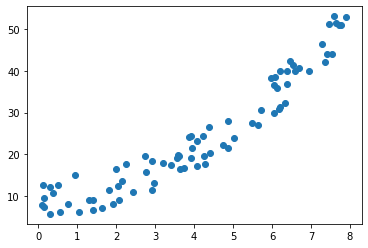

In [30]:
plt.scatter(X_train,y_train)

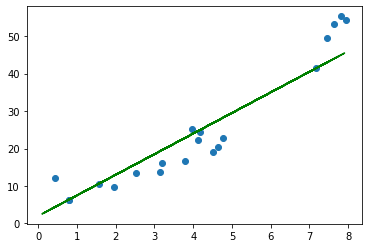

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color="green")

## Present your sollution

## save your model

In [35]:
import joblib
joblib.dump(lr, "students_mark_predictor_model")

['students_mark_predictor_model']

In [36]:
model = joblib.load("students_mark_predictor_model")

In [37]:
model.predict([[15]])[0][0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


84.41077260170158

## Launch, monitor, and maintain your system

In [38]:
import pickle
filename = 'final_model.sav'
pickle.dump(model,open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test,y_test)
print(result) 

0.8826200571575015
